# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.

Let's start with loading any libraries you need.

In [23]:
# Load libraries you need here
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt


Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Use a portion of the training data as validation data. Do you need to do any preprocessing?

x_val, y_val = x_train[40000:50000], y_train[40000:50000]

Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [30]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [31]:
# Normalize the data
#x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
1563/1563 [==============================] - 37s 22ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1014
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1014
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3025 - val_accuracy: 0.1022
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3025 -

Visualize the model performance

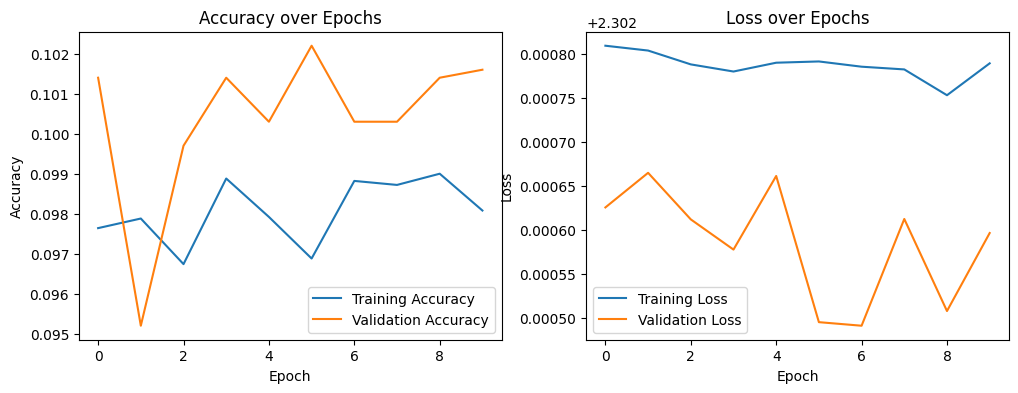

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluate on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# prints and plots you might need to evaluate.


# Excercise
Experiment with different architectures and try to find a model that performs well.